Luke Steverango                               MATH 387: Honours Numerical Analysis                                  260570652

Question 1:

We seek the the values of $\alpha$ and $k$, dependent on our choice of $a > 0$ such that $k + \alpha$ is maximized with $f_{a} \in C^{k, \alpha}([-1,1])$. With that in mind we shall look at a bunch of cases. We have that,


$$ f_{a}(x) = \begin{cases} 
      x^{a} & x >0 \\
      0 & x \leq 0 \\
   \end{cases}
$$ 

where $a > 0$. We need to show that $f_{a} \in C^{k}([-1,1])$ and $f_{a}^{k} \in C^{0,\alpha}([-1,1])$, for the highest possible $k$. Note first, for $x,y \in [-1,0]$, $f_{a}(x) = 0$, so we have that for all $k \in \mathbb{N}$, $f_{a} \in C^{k}([-1,0])$ and $f_{a}^{k} \in C^{0,\alpha}([-1,0])$ for all $\alpha$. So it remains to consider when $x$, or $y$, or $x$ and $y \in (0,1]$.

Now, first consider $a \in \mathbb{N}$. For such an $a$, if we take $k = a$, then we would encounter a discontinuity at $x = 0$ as

$$ f^{a}_{a}(x) = \begin{cases} 
      a! & x >0 \\
      0 & x \leq 0 \\
   \end{cases}
$$ 

So we can take up to $a-1$ derivatives and still have a continuous function as, 

$$ f^{a-1}_{a}(x) = \begin{cases} 
      (a-1)!x & x >0 \\
      0 & x \leq 0 \\
   \end{cases},
$$ 

is clearly continous over the two subintervals $[-1,0]$ and $(0,1]$, as well as at $x = 0$. Now what if $a \in \mathbb{R}\setminus \mathbb{N}$. Clearly over the given interval, the function $g(x) = x^{\beta}$, where $\beta < 0$, blows up at $x = 0$. So we need $a \geq 0$ at least. We know from above we can take at least $a-1$ derivatives. Since however the fractional part of the $a$ is non-zero in this case, we then have we can take up to $a$ derivatives minus this fractional part. This gives us,

$$ f^{a}_{a}(x) = \begin{cases} 
      (a)\cdot(a-1)\cdot \cdot \cdot (a -\lfloor{a}\rfloor + 1)\cdot x^{a -\lfloor{a}\rfloor} & x >0 \\
      0 & x \leq 0 \\
   \end{cases},
$$ 

which is again continuous over $[-1,0]$ and $(0,1]$, as well as at $x = 0$. Thus the maximum $k$ we can take is,

$$ k = \begin{cases} 
      a -frac\{a\} & a \in \mathbb{R}\setminus \mathbb{N} \\
       a-1 & a \in \mathbb{N} \\
   \end{cases},
$$, 

where $frac\{a\}$ is the fractional part of $a$. Note, we maximize in $k$, as since $\alpha \leq 1$, we then have that decreasing $k$ by $1$ would not render a maximum unless we could increase $\alpha$ by $1$. So we take $k$ as large as possible, as defined above and then see for what values of $\alpha$ it holds. As we noted earlier the constant function $0 \in C^{k}([-1,0])$ and $0 \in C^{0,\alpha}([-1,0]), \forall \alpha$. So without lose of generality, let $x, y \in [-1,1)$ and $x > y$. We then have for $\alpha \leq a$ and $a > 0$,

\begin{align*}
\sup_{-1\leq x, y\leq 1} \frac{\left|f_{a}(x) - f_{a}(y)\right|}{|x - y|^{\alpha}} &= \sup_{-1\leq x, y\leq 1} \frac{\left|x^a - y^a\right|}{|x - y|^{\alpha}}\\
 &\leq \sup_{-1\leq x, y\leq 1} \frac{\left|x - y\right|^a}{|x - y|^{\alpha}}\\
 &= \sup_{-1\leq x, y\leq 1} |x - y|^{a -\alpha}\\
 &\leq 2^{a -\alpha},\\
\end{align*}

which therefore implies $f_{a} \in C^{k}([-1,1])$ and $f_{a}^{k} \in C^{0,\alpha}([-1,1])$ with $k$ as above. Now for $a > \alpha$ and for any $a >0$, we then have,

\begin{align*}
\sup_{-1\leq x, y\leq 1} \frac{\left|f_{a}(y) - f_{a}(x)\right|}{|y - x|^{\alpha}} &\geq \sup_{-1\leq x\leq 1} \frac{\left|(2x)^a - x^a\right|}{|2x - x|^{\alpha}}\\
 &= (2^{a} - 1)\sup_{-1\leq x\leq 1} x^{a - \alpha},\\
\end{align*},

which diverges for $x = 0$. Thus we have that $\alpha \leq a$. This then gives us putting it altogether that the maximum $k + \alpha$ such that $f_{a} \in C^{k}([-1,1])$ and $f_{a}^{k} \in C^{0,\alpha}([-1,1])$ is given by,

$$ \max_{k,\alpha} (k+\alpha) = \begin{cases} 
      2a -frac\{a\}& a \in \mathbb{R}\setminus \mathbb{N}  \\
      2a - 1 & a \in \mathbb{N}. \\
   \end{cases}
$$ 

Question 2:

In [71]:
import numpy as np
import math
import scipy.special as scp
import matplotlib.pyplot as pyplt 
#Importing Stuff

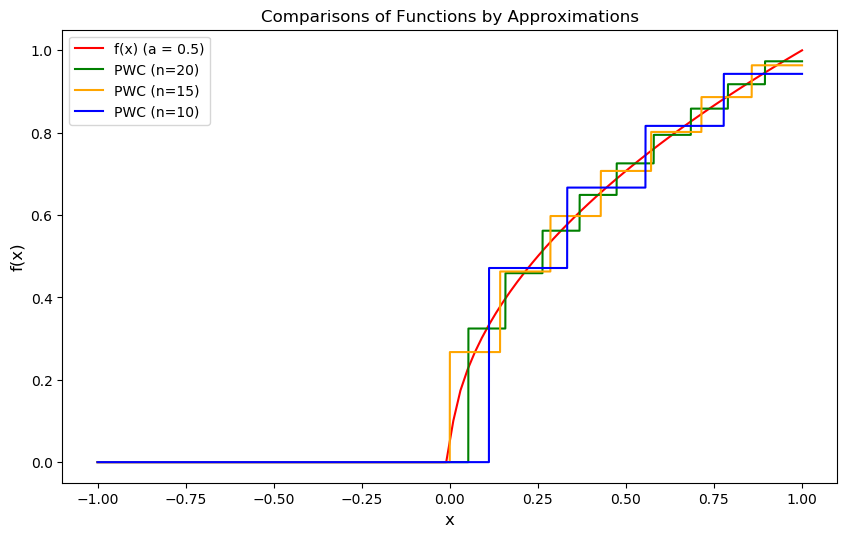

In [211]:
#Defines the Piecewise Function
def function(x,a):
    if (x > 0):
        return x**a
    else:
        return 0

#Makes n evenly spaced nodes over (-1,1)
def equidist_nodes(n):
    return np.linspace(-1,1,n)

#Calculates the function values for 
def function_values(n,a):
    y_values = []
    q = equidist_nodes(n)
    for x in range(len(equidist_nodes(n))):
        y_values.append(function(q[x],a))
    return y_values

#Calculates the various intervals between function points and the midpoints of these intervals
def intervals(interval_points):
    intervals = []
    midpoints = []
    for x in range(len(interval_points)-1):
        y = [interval_points[x],interval_points[x+1]]
        z = (interval_points[x] + interval_points[x+1])/2
        intervals.append(y)
        midpoints.append(z)
    return intervals, midpoints

#Creates the uniform constant functions for each interval specified
def PieceWiseFunction(x,intervals_list, midpoints_list,a,n):
    intervals_list = intervals(equidist_nodes(n))[0]
    midpoints_list = intervals(equidist_nodes(n))[1]
    conditional_list = []
    piecewise_values = []
    for k in range(len(intervals_list) - 1):
        conditional_list.append((x>intervals_list[k][0])&(x<=intervals_list[k][1]))
    
    for m in range(len(midpoints_list)):
        piecewise_values.append(function(midpoints_list[m],a))
    
    z = np.piecewise(x,conditional_list,piecewise_values)
    return z

#Calculating x and y values for a = 0.5
x_1 = np.linspace(-1,1,10000)
y_1 = PieceWiseFunction(x_1,intervals(equidist_nodes(20)),intervals(equidist_nodes(20)),0.5,20)
y_2 = PieceWiseFunction(x_1,intervals(equidist_nodes(15)),intervals(equidist_nodes(15)),0.5,15)
y_3 = PieceWiseFunction(x_1,intervals(equidist_nodes(10)),intervals(equidist_nodes(10)),0.5,10)
y_1[0] = 0
y_2[0] = 0
y_3[0] = 0

#Plotting Stuff
x = equidist_nodes(100)
y = function_values(100,0.5)
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y, color="red", label='f(x) (a = 0.5)')
pyplt.plot(x_1,y_1, color="green", label='PWC (n=20)')  
pyplt.plot(x_1,y_2, color="orange", label='PWC (n=15)')
pyplt.plot(x_1,y_3, color="blue", label='PWC (n=10)')
pyplt.legend(loc='best')
pyplt.show()

Given above and below are graphs of the approximation of the function, $f$ with uniform constant step functions. I take $a = 0.5, 2, 5$.  I also take n values of $n = 10, 15, 20$.

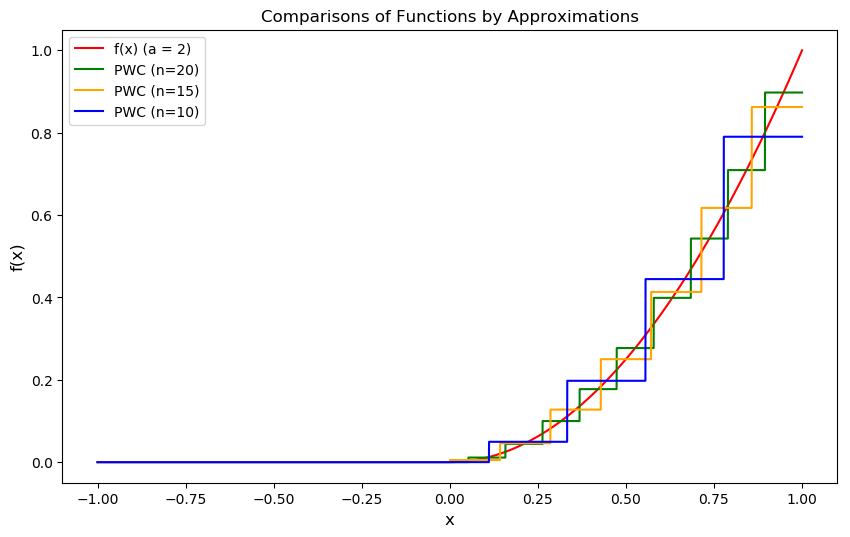

In [212]:
#Calculating x and y values for a = 2
x_1 = np.linspace(-1,1,10000)
y_4 = PieceWiseFunction(x_1,intervals(equidist_nodes(20)),intervals(equidist_nodes(20)),2,20)
y_5 = PieceWiseFunction(x_1,intervals(equidist_nodes(15)),intervals(equidist_nodes(15)),2,15)
y_6 = PieceWiseFunction(x_1,intervals(equidist_nodes(10)),intervals(equidist_nodes(10)),2,10)
y_4[0] = 0
y_5[0] = 0
y_6[0] = 0

#Plotting Stuff
x = equidist_nodes(100)
y = function_values(100,2)
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y, color="red", label='f(x) (a = 2)')
pyplt.plot(x_1,y_4, color="green", label='PWC (n=20)')  
pyplt.plot(x_1,y_5, color="orange", label='PWC (n=15)')
pyplt.plot(x_1,y_6, color="blue", label='PWC (n=10)')
pyplt.legend(loc='best')
pyplt.show()

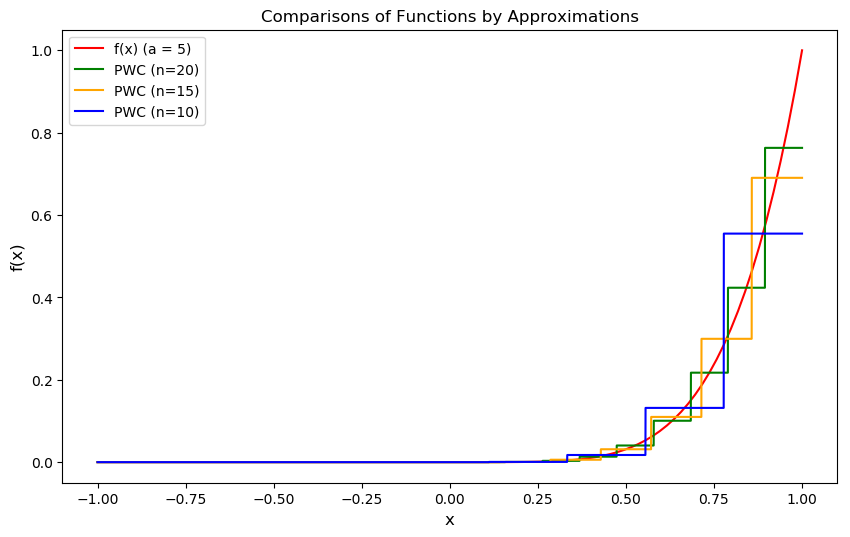

In [213]:
#Calculating x and y values for a = 5
x_1 = np.linspace(-1,1,10000)
y_7 = PieceWiseFunction(x_1,intervals(equidist_nodes(20)),intervals(equidist_nodes(20)),5,20)
y_8 = PieceWiseFunction(x_1,intervals(equidist_nodes(15)),intervals(equidist_nodes(15)),5,15)
y_9 = PieceWiseFunction(x_1,intervals(equidist_nodes(10)),intervals(equidist_nodes(10)),5,10)
y_7[0] = 0
y_8[0] = 0
y_9[0] = 0

#Plotting Stuff
x = equidist_nodes(100)
y = function_values(100,5)
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y, color="red", label='f(x) (a = 5)')
pyplt.plot(x_1,y_7, color="green", label='PWC (n=20)')  
pyplt.plot(x_1,y_8, color="orange", label='PWC (n=15)')
pyplt.plot(x_1,y_9, color="blue", label='PWC (n=10)')
pyplt.legend(loc='best')
pyplt.show()

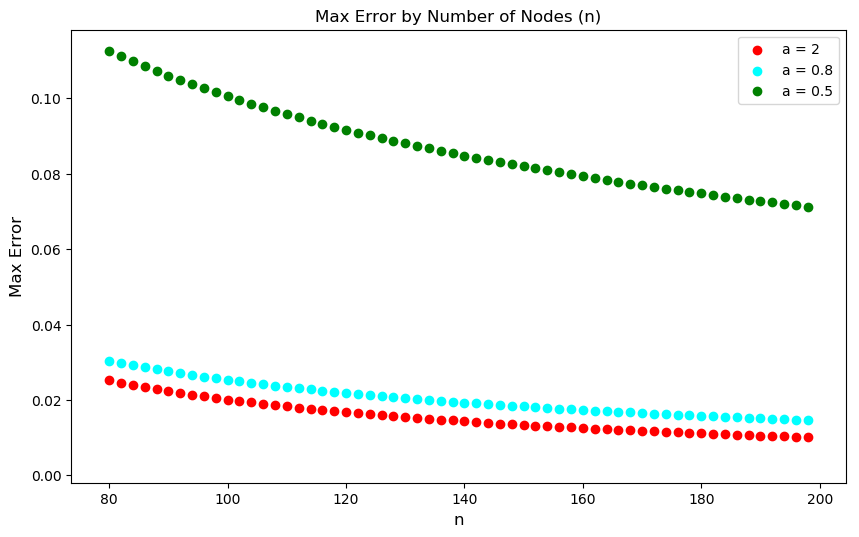

In [222]:
#Takes the Intervals and makes all the lists into just one big set of points
def IntervalstoPoints(Interval):
    allPoints = []
    q = len(Interval)
    for x in range(q):
        allPoints.append(Interval[x][0])
    allPoints.append(1)
    return allPoints

#Finds the first positive element in a list for locating the an x-value in which interval
def FirstPositiveElement(List):
    for x in range(len(List)):
        if (List[x] > 0):
            return List[x]

#Finds the index where the first positive element appears
def FirstPositiveElementindex(List):
    for x in range(len(List)):
        if (List[x] > 0):
            return x

#Calculates the MaxNorm of the Constant Piecewise Functions against the function
def ErrorMaxNorm(x,intervals_list, midpoints_list,a,n):
    p = len(intervals_list[1])-1
    q = FirstPositiveElement(IntervalstoPoints(intervals_list[0]))
    r = FirstPositiveElementindex((intervals_list)[1])
    if(a>=1):
        y = np.abs(function(midpoints_list[1][p],a) - function(1,a))
        return y
    else:
        b = np.abs(0 - function(q,a))
        return b

#To plot the Error Values for many n
n_list = np.array(range(80,200,2))

ListofErrors = []
ListofErrors2 = []
ListofErrors3 = []

for j in n_list:
    ListofErrors.append(ErrorMaxNorm(equidist_nodes(j),intervals(equidist_nodes(j)),intervals(equidist_nodes(j)),2,j))
    
for j in n_list:
    ListofErrors2.append(ErrorMaxNorm(equidist_nodes(j),intervals(equidist_nodes(j)),intervals(equidist_nodes(j)),0.5,j))

for j in n_list:
    ListofErrors3.append(ErrorMaxNorm(equidist_nodes(j),intervals(equidist_nodes(j)),intervals(equidist_nodes(j)),0.8,j))


    
#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Max Error by Number of Nodes (n)")
pyplt.xlabel("n", size=12)
pyplt.ylabel("Max Error", size=12)
pyplt.scatter(n_list,ListofErrors,color="red", label="a = 2" )
pyplt.scatter(n_list,ListofErrors3,color="cyan", label="a = 0.8")
pyplt.scatter(n_list,ListofErrors2,color="green", label="a = 0.5")
pyplt.legend(loc='best')
pyplt.show()

Plotted above are the various curves of max error where $a = 0.5, 0.8, 2$. 

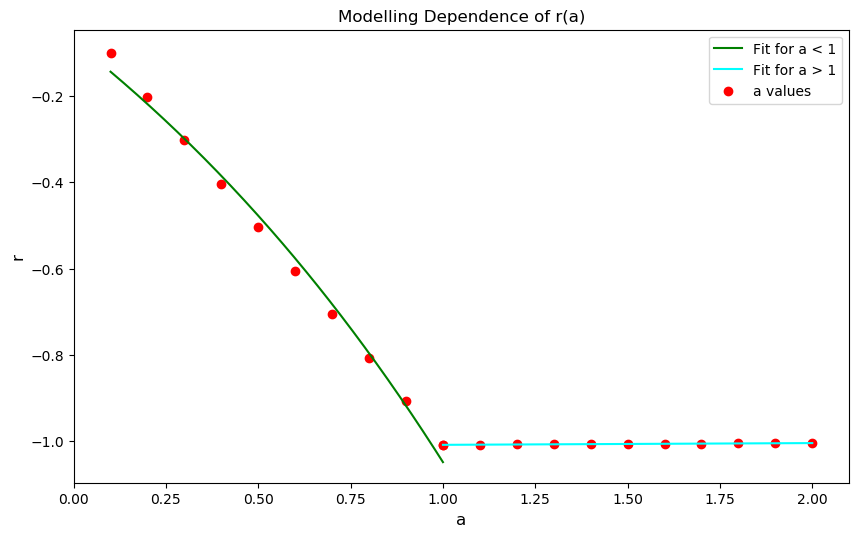

In [241]:
#Takes the Intervals and makes all the lists into just one big set of points
def IntervalstoPoints(Interval):
    allPoints = []
    q = len(Interval)
    for x in range(q):
        allPoints.append(Interval[x][0])
    allPoints.append(1)
    return allPoints

#Finds the first positive element in a list for locating the an x-value in which interval
def FirstPositiveElement(List):
    for x in range(len(List)):
        if (List[x] > 0):
            return List[x]

#Finds the index where the first positive element appears
def FirstPositiveElementindex(List):
    for x in range(len(List)):
        if (List[x] > 0):
            return x
#Calculates the MaxNorm of the Constant Piecewise Functions against the function
def ErrorMaxNorm(x,intervals_list, midpoints_list,a,n):
    p = len(intervals_list[1])-1
    q = FirstPositiveElement(IntervalstoPoints(intervals_list[0]))
    r = FirstPositiveElementindex((intervals_list)[1])
    if(a>=1):
        y = np.abs(function(midpoints_list[1][p],a) - function(1,a))
        return y
    else:
        b = np.abs(0 - function(q,a))
        return b

#To plot the Error Values for many n
n_list = np.array(range(80,200,2))

ListofErrors = []

#For two lists of r values to estimate the dependence r(a)
r_values1 = []
r_values2 = []

#Two lists of a values to estimate the dependence r(a)
a_list1 = np.linspace(0.1,1,10)
a_list2 = np.linspace(1,2,11)

#Loops that calculate the fits for each Max Errors for each set of r values
for a in a_list1:
    for j in n_list:
        ListofErrors.append(ErrorMaxNorm(equidist_nodes(j),intervals(equidist_nodes(j)),intervals(equidist_nodes(j)),a,j))
    fit = np.polyfit(np.log((n_list)), np.log(ListofErrors), deg=1)
    function_val = np.exp(fit[1])*np.linspace(80,200,200)**(fit[0])   
    r_values1.append(fit[0])
    ListofErrors = []
    
for a in a_list2:
    for j in n_list:
        ListofErrors.append(ErrorMaxNorm(equidist_nodes(j),intervals(equidist_nodes(j)),intervals(equidist_nodes(j)),a,j))
    fit = np.polyfit(np.log((n_list)), np.log(ListofErrors), deg=1)
    function_val2 = np.exp(fit[1])*np.linspace(80,200,200)**(fit[0])   
    r_values2.append(fit[0])
    ListofErrors = []

#Plotting the fit of the dependence 
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Modelling Dependence of r(a)")
pyplt.xlabel("a", size=12)
pyplt.ylabel("r", size=12)
fit2 = np.polyfit(2**(a_list1), r_values1, deg=1)
function_values2 = fit2[1] + fit2[0]*2**((np.linspace(0.1,1,200)))
pyplt.scatter(a_list1,r_values1,color = 'red', label="a values")
pyplt.plot(np.linspace(0.1,1,200),function_values2, color='green', label="Fit for a < 1" )

fit3 = np.polyfit((a_list2), r_values2, deg=1)
function_values2 = fit3[1] + fit3[0]*(np.linspace(1,2,200))
pyplt.scatter(a_list2,r_values2,color = 'red')
pyplt.plot(np.linspace(1,2,200),function_values2, color='cyan', label="Fit for a > 1")
pyplt.legend(loc='best')
pyplt.show()

Now, having calculated for various $a$ values, we can now see that there is a piecewise dependence to $r(a)$. For $a < 1$, we have that the $r(a) \approx C\cdot2^{a}$ where $C \approx -0.9742$. For $a \geq 1$ we have that $r(a) \approx -1$, i.e, its roughly constant. Noticing from the function graphs above we have that for $a < 1$, you have a sharp "kink" in the function which gives you the max error in that first interval near $0$. This sharp "kink" causes the function to move in a less than regular way and thus the constant function intervals have trouble approximating the function with this sudden movement upward. For $a \geq 1$, the troublesome point at $0$ is removed, the function becomes more regular and as a result the errors are roughly the same since for large $n$, one can approximate the end point closely, where the max error occurs. This lends itself to the implication that, the smoother the transition of a function in an interval, the easier it is to approximate with piecewise step functions. The more sudden changes in a function that happen, the harder it is for step functions to approximate without a large amount of subintervals.

Question 3:

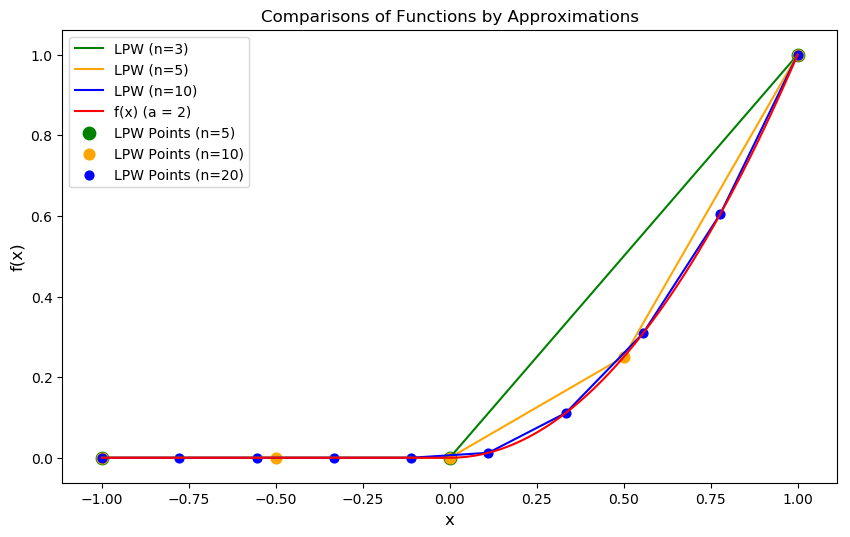

In [170]:
#Defines the Piecewise Function
def function(x,a):
    if (x > 0):
        return x**a
    else:
        return 0

#Makes n equally spaced over (-1,1)
def equidist_nodes(n):
    return np.linspace(-1,1,n)

#Makes the Linear Approx Values at the points it equals the function
def LinearApprox(nodes_points,a):
    approxfunction_values = []
    for x in range(len(nodes_points)):
        approxfunction_values.append(function(nodes_points[x],a))
    return approxfunction_values

#Given an interval, finds the interval x is in and then gives back the chosen interval
def LinearApproxInterval(x,interval_endpoints,a):
    interval_chosen = []
    for k in range(len(interval_endpoints)):
        if x < interval_endpoints[k]:
            interval_chosen.append(interval_endpoints[k-1])
            interval_chosen.append(interval_endpoints[k])
            return interval_chosen
    return [1-1/2*len(interval_endpoints), 1]

#Calculates the values for each Interval
def LinearApproxValues(x,interval_chosen,a):
    m = (function(interval_chosen[1],a) - function(interval_chosen[0],a))/(interval_chosen[1] - interval_chosen[0])
    b = function(interval_chosen[0],a) - m*interval_chosen[0]
    z = m*x + b
    return z

#Gets the value of the function over a bunch of nodes
def LinearValues(x,interval_endpoints,a):
    lin_val = []
    for k in x:
        y = LinearApproxValues(k,LinearApproxInterval(k,interval_endpoints,a),a)
        lin_val.append(y)
    return lin_val

#Calculates the function at a bunch of values
def function_values(n,a):
    y_values = []
    q = equidist_nodes(n)
    for x in range(len(equidist_nodes(n))):
        y_values.append(function(q[x],a))
    return y_values 

#Calculate the functions at various values of a = 2
y = function_values(100,2)
y_1 = LinearValues(x,equidist_nodes(3),2)
x_1a = equidist_nodes(3)
y_1a = LinearApprox(x_1a,2)
y_2 = LinearValues(x,equidist_nodes(5),2)
x_2a = equidist_nodes(5)
y_2a = LinearApprox(x_2a,2)
y_3 = LinearValues(x,equidist_nodes(10),2)
x_3a = equidist_nodes(10)
y_3a = LinearApprox(x_3a,2)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='LPW (n=3)')
pyplt.scatter(x_1a,y_1a,s=80, color="green", label='LPW Points (n=3)')
pyplt.plot(x,y_2, color="orange", label='LPW (n=5)')
pyplt.scatter(x_2a,y_2a,s=60, color="orange", label='LPW Points (n=5)')
pyplt.plot(x,y_3, color="blue", label='LPW (n=10)')
pyplt.scatter(x_3a,y_3a,s=40, color="blue", label='LPW Points (n=10)')
pyplt.plot(x,y, color="red", label='f(x) (a = 2)')
pyplt.legend(loc='best')
pyplt.show()

Given above and below are graphs of the approximation of the function, $f$ with piecewise linear functions. I take $a = 0.5, 2, 5$. I also take n values of $n = 10, 15, 20$.

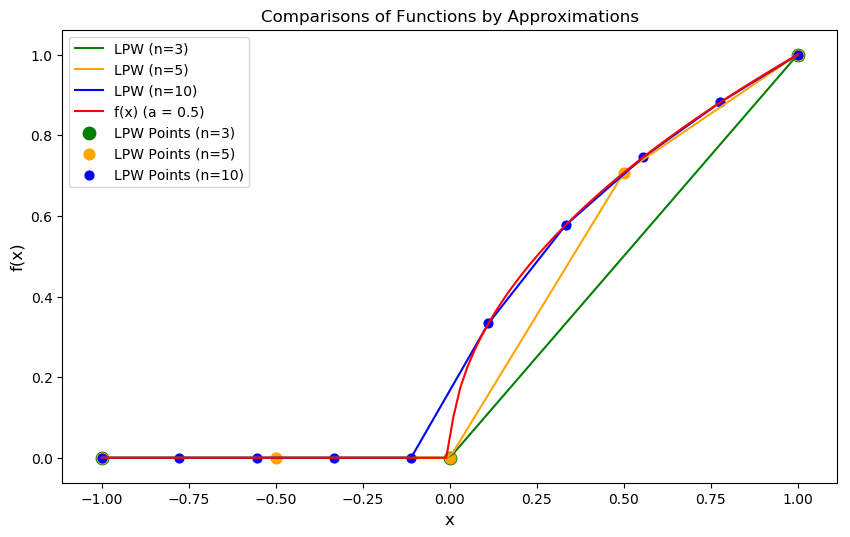

In [171]:
#Calculates x and y values for the functions at a = 0.5
x = np.linspace(-1,1,100)
y = function_values(100,0.5)
y_1 = LinearValues(x,equidist_nodes(3),0.5)
x_1a = equidist_nodes(3)
y_1a = LinearApprox(x_1a,0.5)
y_2 = LinearValues(x,equidist_nodes(5),0.5)
x_2a = equidist_nodes(5)
y_2a = LinearApprox(x_2a,0.5)
y_3 = LinearValues(x,equidist_nodes(10),0.5)
x_3a = equidist_nodes(10)
y_3a = LinearApprox(x_3a,0.5)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='LPW (n=3)')
pyplt.scatter(x_1a,y_1a,s=80, color="green", label='LPW Points (n=3)')
pyplt.plot(x,y_2, color="orange", label='LPW (n=5)')
pyplt.scatter(x_2a,y_2a,s=60, color="orange", label='LPW Points (n=5)')
pyplt.plot(x,y_3, color="blue", label='LPW (n=10)')
pyplt.scatter(x_3a,y_3a,s=40, color="blue", label='LPW Points (n=10)')
pyplt.plot(x,y, color="red", label='f(x) (a = 0.5)')
pyplt.legend(loc='best')
pyplt.show()

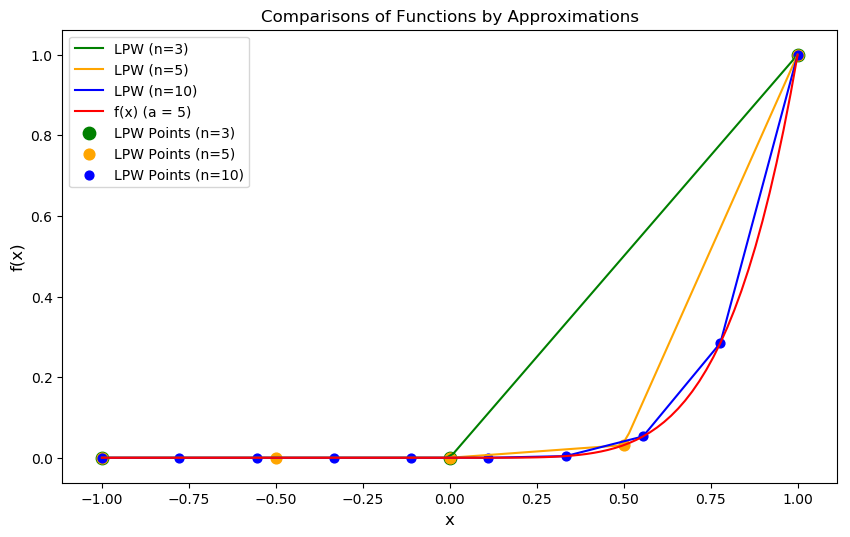

In [172]:
#Calculates the x and y values for various functions with a = 5
x = np.linspace(-1,1,100)
y = function_values(100,5)
y_1 = LinearValues(x,equidist_nodes(3),5)
x_1a = equidist_nodes(3)
y_1a = LinearApprox(x_1a,5)
y_2 = LinearValues(x,equidist_nodes(5),5)
x_2a = equidist_nodes(5)
y_2a = LinearApprox(x_2a,5)
y_3 = LinearValues(x,equidist_nodes(10),5)
x_3a = equidist_nodes(10)
y_3a = LinearApprox(x_3a,5)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='LPW (n=3)')
pyplt.scatter(x_1a,y_1a,s=80, color="green", label='LPW Points (n=3)')
pyplt.plot(x,y_2, color="orange", label='LPW (n=5)')
pyplt.scatter(x_2a,y_2a,s=60, color="orange", label='LPW Points (n=5)')
pyplt.plot(x,y_3, color="blue", label='LPW (n=10)')
pyplt.scatter(x_3a,y_3a,s=40, color="blue", label='LPW Points (n=10)')
pyplt.plot(x,y, color="red", label='f(x) (a = 5)')
pyplt.legend(loc='best')
pyplt.show()

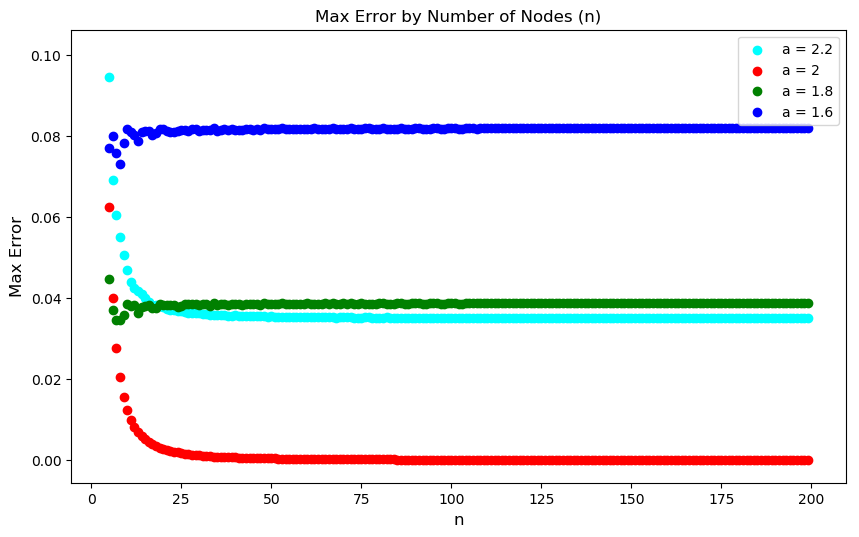

In [242]:
#Defines the piecewise function
def function(x,a):
    if (x > 0):
        return x**a
    else:
        return 0

#Makes n equally spaced nodes over (-1,1)
def equidist_nodes(n):
    return np.linspace(-1,1,n)

#Calculates the Linear function
def LinearApprox(nodes_points,a):
    approxfunction_values = []
    for x in range(len(nodes_points)):
        approxfunction_values.append(function(nodes_points[x],a))
    return approxfunction_values

#Finds the interval that an x belongs to
def LinearApproxInterval(x,interval_endpoints,a):
    interval_chosen = []
    for k in range(len(interval_endpoints)):
        if x < interval_endpoints[k]:
            interval_chosen.append(interval_endpoints[k-1])
            interval_chosen.append(interval_endpoints[k])
            return interval_chosen
    return [1-1/len(interval_endpoints), 1+1/len(interval_endpoints)]

#Calculates the Values of the Linear Function
def LinearApproxValues(x,interval_chosen,a):
    m = (function(interval_chosen[1],a) - function(interval_chosen[0],a))/(interval_chosen[1] - interval_chosen[0])
    b = function(interval_chosen[0],a) - m*interval_chosen[0]
    z = m*x + b
    return z

#Calculates the linear values for a lot of points
def LinearValues(x,interval_endpoints,a):
    lin_val = []
    for k in x:
        y = LinearApproxValues(k,LinearApproxInterval(k,interval_endpoints,a),a)
        lin_val.append(y)
    return lin_val


x = np.linspace(-1,1,100)

#Function Values for a lot of points
def function_values(n,a):
    y_values = []
    q = equidist_nodes(n)
    for x in range(len(equidist_nodes(n))):
        y_values.append(function(q[x],a))
    return y_values   

#Computes the Max Norm between the Linear Pieceiwse Functions and the Function at their respective evaluations
def ErrorMaxNorm3(Values,FunctionValues):
    return np.max(np.abs(np.array(Values)-np.array(FunctionValues)))

#List of n's to run over
n_list_linear1 = np.array(range(5,200,1))

#Calculates a bunch of errors
ListofErrors_linear1 = []
ListofErrors_linear2 = []
ListofErrors_linear3 = []
ListofErrors_linear4 = []

#Caclulates the Error Curves for a various a values
for j in n_list_linear1:
    ListofErrors_linear1.append(ErrorMaxNorm3(LinearValues(x,equidist_nodes(j),2),function_values(100,2)))
    
for j in n_list_linear1:
    ListofErrors_linear2.append(ErrorMaxNorm3(LinearValues(x,equidist_nodes(j),2),function_values(100,1.8)))
    
for j in n_list_linear1:
    ListofErrors_linear3.append(ErrorMaxNorm3(LinearValues(x,equidist_nodes(j),2),function_values(100,1.6)))
    
for j in n_list_linear1:
    ListofErrors_linear4.append(ErrorMaxNorm3(LinearValues(x,equidist_nodes(j),2),function_values(100,2.2)))

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Max Error by Number of Nodes (n)")
pyplt.xlabel("n", size=12)
pyplt.ylabel("Max Error", size=12)
pyplt.scatter(n_list_linear1,ListofErrors_linear4, color="cyan", label="a = 2.2")
pyplt.scatter(n_list_linear1,ListofErrors_linear1, color="red", label="a = 2")
pyplt.scatter(n_list_linear1,ListofErrors_linear2, color="green", label ="a = 1.8")
pyplt.scatter(n_list_linear1,ListofErrors_linear3, color="blue",label = "a = 1.6")
pyplt.legend(loc='best')
pyplt.show()

Plotted above are the various curves of max error where $a = 1.6, 1.8, 2, 2.2$. I note the max error converges to a stable level much faster than the constant uniform approximations. I also would argue it is relatively better at approximating the function, as expected.

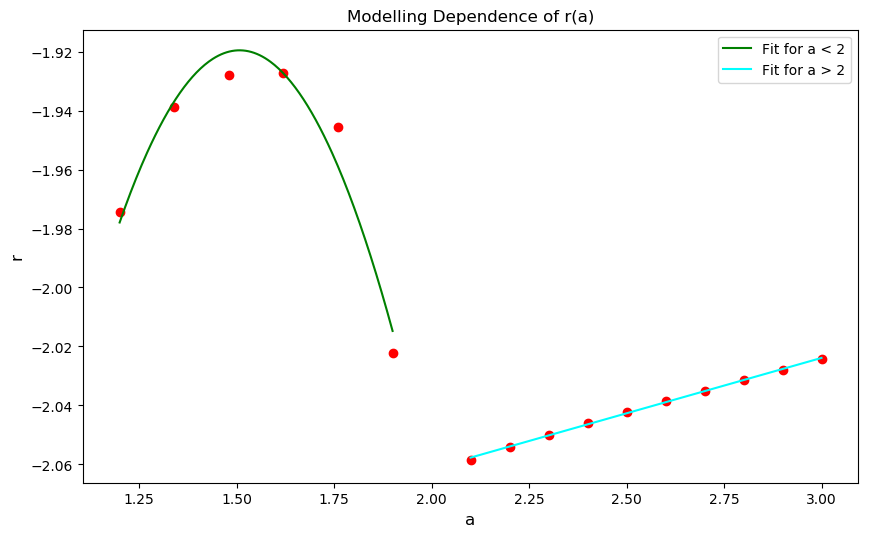

In [248]:
#Two lists for the various r values about 
r_values1 = []
r_values2 = []

#Two lists of errors around a = 2
ListofErrors_linear1 = []
ListofErrors_linear2 = []

#List of n-values to look over
n_list_linear1 = np.array(range(5,200,1))

#List of a values
a_list1 = np.linspace(1.2,1.9,6)
a_list2 = np.linspace(2.1,3,10)

#Calculate the r values for the various a values and n values
for a in a_list1:
    for j in n_list_linear1:
        ListofErrors_linear1.append(ErrorMaxNorm3(LinearValues(x,equidist_nodes(j),a),function_values(100,a)))
    fit = np.polyfit(np.log((n_list_linear1)), np.log(ListofErrors_linear1), deg=1)
    function_values_linear1 = np.exp(fit[1])*np.linspace(5,200,200)**(fit[0])   
    r_values1.append(fit[0])
    ListofErrors_linear1 = []
    
for a in a_list2:
    for j in n_list_linear1:
        ListofErrors_linear2.append(ErrorMaxNorm3(LinearValues(x,equidist_nodes(j),a),function_values(100,a)))
    fit = np.polyfit(np.log((n_list_linear1)), np.log(ListofErrors_linear2), deg=1)
    function_values_linear2 = np.exp(fit[1])*np.linspace(5,200,200)**(fit[0])   
    r_values2.append(fit[0])
    ListofErrors_linear2 = []

#Plotting Stuff

fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Modelling Dependence of r(a)")
pyplt.xlabel("a", size=12)
pyplt.ylabel("r", size=12)

fit_linear1 = np.polyfit(a_list1, r_values1, deg=2)
function_values2 = fit_linear1[2] + fit_linear1[1]*((np.linspace(1.2,1.9,200))) + fit_linear1[0]*((np.linspace(1.2,1.9,200)))**2
pyplt.scatter(a_list1,r_values1,color = 'red')
pyplt.plot(np.linspace(1.2,1.9,200),function_values2, color='green',label="Fit for a < 2" )

fit_linear2 = np.polyfit(a_list2, r_values2, deg=1)
function_values2 = fit_linear2[1] + fit_linear2[0]*(np.linspace(2.1,3,200))
pyplt.scatter(a_list2,r_values2,color = 'red')
pyplt.plot(np.linspace(2.1,3,200),function_values2, color='cyan',label="Fit for a > 2")
pyplt.legend(loc='best')
pyplt.show()

Now, having calculated for various $a$ values, we can now see that there is again a piecewise dependence to $r(a)$ this time centred about $a = 2$. For $a < 2$, we have that the $r(a) \approx C\cdot a^{2}$ where $C \approx -0.6178$. For $a \geq 2$ we have that $r(a) \approx C\cdot a$, i.e, where $C \approx 0.0376$. We see from the max error graph above that $a = 2$ has the minimum curve error implying this relationship. Noticing from the function graphs above we have that for $a < 2$, the function is approximately linear. Due to the relative "linearity this lends itself to be better approximated by linear functions and as a result reduce the overall error. For $a \geq 2$, since the function explodes faster, the rate of convergence slightly increases for large polynomials. This is probably due to the fact that for higher order $a$ values, the function shoots up faster and thus it becomes closer to a vertical line. This lends itself to easier approximation by line segments. 

Question 4:

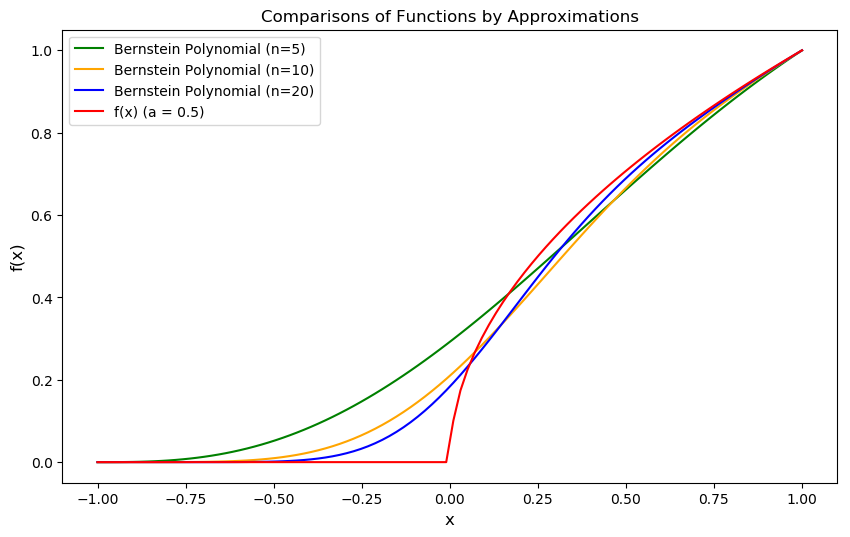

In [230]:
#Defines the Function for x and a
def function(x,a):
    if (x > 0):
        return x**a
    else:
        return 0

#Creates equally spaced nodes for (-1,1)
def equidist_nodes(n):
    return np.linspace(-1,1,n)

#Calculates the function values
def function_values(n,a):
    y_values = []
    q = equidist_nodes(n)
    for x in range(len(equidist_nodes(n))):
        y_values.append(function(q[x],a))
    return y_values

#Creates the Bernstein kth-basis function
def BernsteinPoly(x,k,n):
    beta = scp.binom(n,k)*(x**k)*(1-x)**(n-k) 
    return beta

#Creates the Bernstein Polynomials on [-1,1]
def BernsteinPolynomials(x,n,a):
    y = (x+1)/2
    sum1 = 0
    for k in range(n+1):
        b = BernsteinPoly(y,k,n)*function((2*k/n)-1,a)
        sum1 = sum1 + b
    return sum1
        
#Various Values of x and y for plotting
x = np.linspace(-1,1,100)
y_1 = BernsteinPolynomials(x,5,0.5)
y_2 = BernsteinPolynomials(x,10,0.5)
y_3 = BernsteinPolynomials(x,20,0.5)
z_1 = function_values(100,0.5)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='Bernstein Polynomial (n=5)')
pyplt.plot(x,y_2, color="orange", label='Bernstein Polynomial (n=10)')
pyplt.plot(x,y_3, color="blue", label='Bernstein Polynomial (n=20)')
pyplt.plot(x,z_1, color="red", label='f(x) (a = 0.5)')
pyplt.legend(loc='best')
pyplt.show()

Given above and below are graphs of the approximation of the function, $f$, with Bernstein Polynomials. I take $a = 0.5, 2, 5$.  I also take n values of $n = 10, 15, 20$. Its also worth noting that just by the graphs they have rather better approximations than the uniform constant and linear.

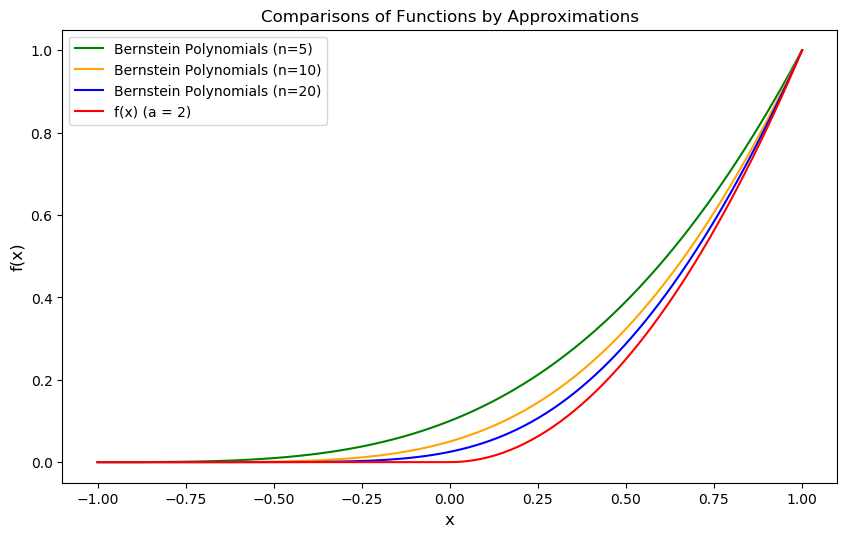

In [231]:
#Calculating various x and y values
x = np.linspace(-1,1,100)
y_1 = BernsteinPolynomials(x,5,2)
y_2 = BernsteinPolynomials(x,10,2)
y_3 = BernsteinPolynomials(x,20,2)
z_1 = function_values(100,2)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='Bernstein Polynomials (n=5)')
pyplt.plot(x,y_2, color="orange", label='Bernstein Polynomials (n=10)')
pyplt.plot(x,y_3, color="blue", label='Bernstein Polynomials (n=20)')
pyplt.plot(x,z_1, color="red", label='f(x) (a = 2)')
pyplt.legend(loc='best')
pyplt.show()

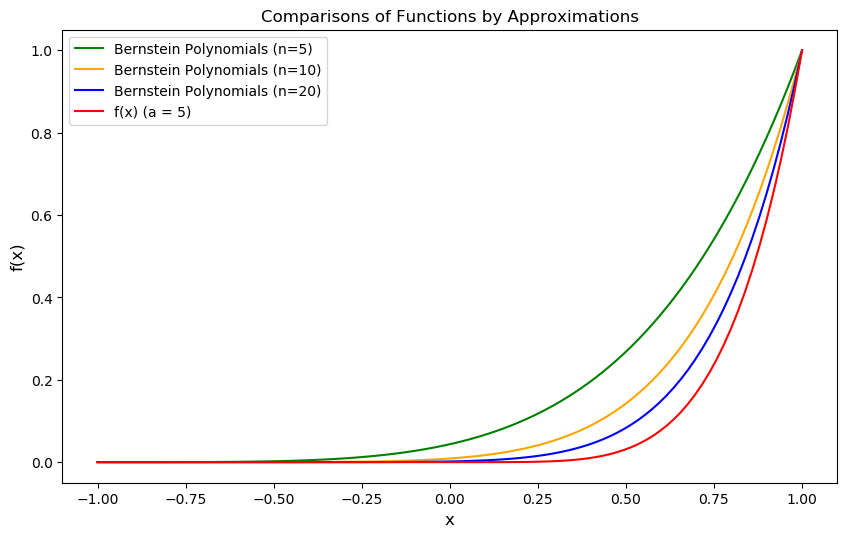

In [232]:
#Calculating various x and y values
x = np.linspace(-1,1,100)
y_1 = BernsteinPolynomials(x,5,5)
y_2 = BernsteinPolynomials(x,10,5)
y_3 = BernsteinPolynomials(x,20,5)
z_1 = function_values(100,5)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='Bernstein Polynomials (n=5)')
pyplt.plot(x,y_2, color="orange", label='Bernstein Polynomials (n=10)')
pyplt.plot(x,y_3, color="blue", label='Bernstein Polynomials (n=20)')
pyplt.plot(x,z_1, color="red", label='f(x) (a = 5)')
pyplt.legend(loc='best')
pyplt.show()

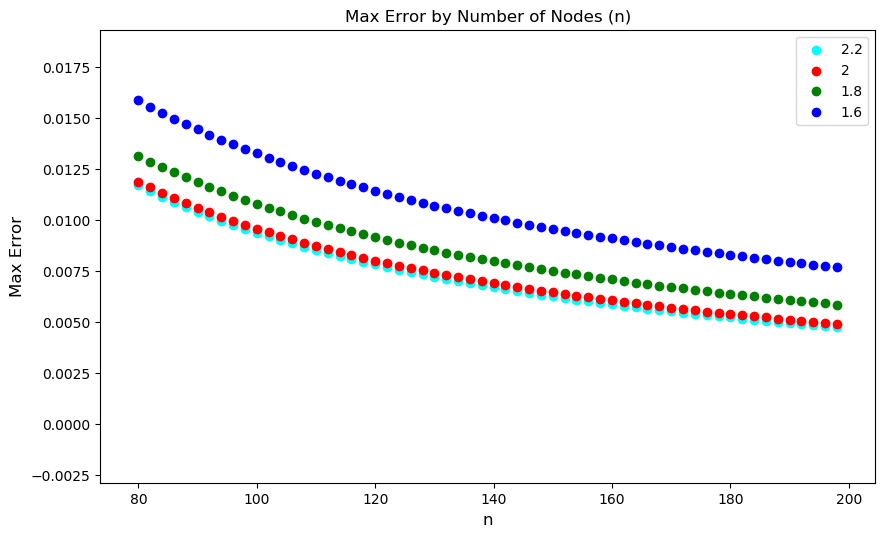

In [234]:
#Calculates the max error between the Bernstein polynomials and the function
def ErrorMaxNormBern(x,n_1,a):
    return np.max(np.abs(np.array(BernsteinPolynomials(x,n_1,a))-np.array(function_values(len(x),a))))

x = np.linspace(-1,1,100)

#List of n values
n_listBern = np.array(range(80,200,2))

#List of errors for various a values
ListofErrors_Bern1 = []
ListofErrors_Bern2 = []
ListofErrors_Bern3 = []
ListofErrors_Bern4 = []

#Calculates the error curves with the n values
for j in n_listBern:
    ListofErrors_Bern1.append(ErrorMaxNormBern(x,j,2.2))
    
for j in n_listBern:
    ListofErrors_Bern2.append(ErrorMaxNormBern(x,j,2))

for j in n_listBern:
    ListofErrors_Bern3.append(ErrorMaxNormBern(x,j,1.8))

for j in n_listBern:
    ListofErrors_Bern4.append(ErrorMaxNormBern(x,j,1.6))
    
#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Max Error by Number of Nodes (n)")
pyplt.xlabel("n", size=12)
pyplt.ylabel("Max Error", size=12)
pyplt.scatter(n_listBern,ListofErrors_Bern1, color="cyan", label="2.2")
pyplt.scatter(n_listBern,ListofErrors_Bern2, color="red", label="2")
pyplt.scatter(n_listBern,ListofErrors_Bern3, color="green", label ="1.8")
pyplt.scatter(n_listBern,ListofErrors_Bern4, color="blue",label = "1.6")
pyplt.legend(loc='best')
pyplt.show()

Above we see the max error in relation to the n values. As we saw before the max error obviously tends down. However, the overall max error is less than the piecewise linear functions and as a result is a better approximation.

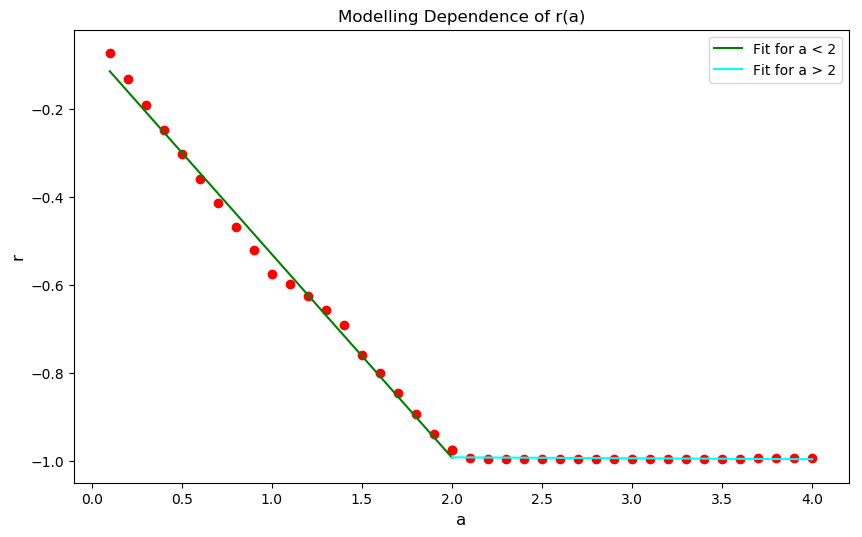

In [247]:
#Calculates the error between the Bernstein Polynomials and the Function at values
def ErrorMaxNormBern(x,n_1,a):
    return np.max(np.abs(np.array(BernsteinPolynomials(x,n_1,a))-np.array(function_values(len(x),a))))

x = np.linspace(-1,1,100)

#List of n values to go over and errors to calculate
n_listBern = np.array(range(80,200,2))
ListofErrors_Bern = []

#Calculates the r values for two sets of r values
r_values1 = []
r_values2 = []

#Calculates the a values for two ranges of a values
a_list1 = np.linspace(0.1,2,20)
a_list2 = np.linspace(2,4,21)

#Calculates the r values for the a ranges and n range
for a in a_list1:
    for j in n_listBern:
        ListofErrors_Bern.append(ErrorMaxNormBern(x,j,a))
    fit = np.polyfit(np.log((n_listBern)), np.log(ListofErrors_Bern), deg=1)
    function_values2 = np.exp(fit[1])*np.linspace(80,200,200)**(fit[0])   
    r_values1.append(fit[0])
    ListofErrors_Bern = []
    
for a in a_list2:
    for j in n_listBern:
        ListofErrors_Bern.append(ErrorMaxNormBern(x,j,a))
    fit = np.polyfit(np.log((n_listBern)), np.log(ListofErrors_Bern), deg=1)
    function_values3 = np.exp(fit[1])*np.linspace(80,200,200)**(fit[0])   
    r_values2.append(fit[0])
    ListofErrors_Bern = []

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Modelling Dependence of r(a)")
pyplt.xlabel("a", size=12)
pyplt.ylabel("r", size=12)

fit4 = np.polyfit(a_list1, r_values1, deg=1)
function_values2 =  fit4[1]+ fit4[0]*((np.linspace(0.1,2,200)))
pyplt.scatter(a_list1,r_values1,color = 'red')
pyplt.plot(np.linspace(0.1,2,200),function_values2, color='green',label="Fit for a < 2")

fit5 = np.polyfit((a_list2), r_values2, deg=1)
function_values2 = fit5[1] + fit5[0]*(np.linspace(2,4,200))
pyplt.scatter(a_list2,r_values2,color = 'red')
pyplt.plot(np.linspace(2,4,200),function_values2, color='cyan', label="Fit for a > 2")
pyplt.legend(loc='best')
pyplt.show()

Now, having calculated for various $a$ values, we can now see that there is a piecewise dependence to $r(a)$ and again the dependence is centred about $a = 2$. For $a < 2$, we have that the $r(a) \approx C\cdot a$ where $C \approx -0.4622$. For $a \geq 2$ we have that $r(a) \approx -1$. Noticing from the graphs above we have that for $a < 2$, the graphs are converging at approximately a linear rate. We also notice that the spacing for the max error curves is larger for $a < 2$, which implies the above relationship. This linear convergence arises again due to the irregular nature of the kink at $x = 0$. Due to its sharp change, the Bernstein polynomials, which are smoother by design, create a large error there. However for large $n$, ie. with more nodes to specify and a large basis, the Bernstein polynomials can become better at the irregularity. For $a \geq 2$, we again arrive at a rate of convergence which is basically constant at $-1$. This is probably due to the fact that the graphs are relatively regular now with no kink, so the errors basically follow the same dependence of $n^{-1}$. 

Question 5:

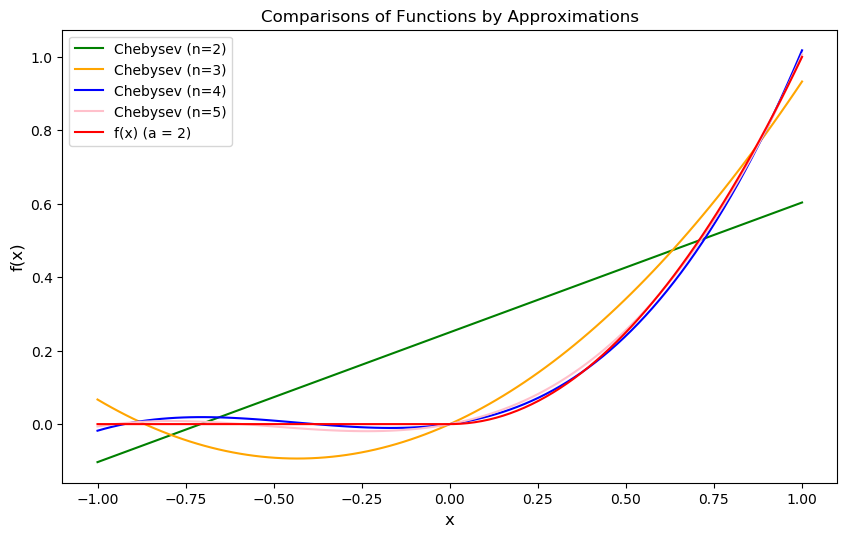

In [113]:
#Calculates the function value given x and a
def function(x,a):
    if (x > 0):
        return x**a
    else:
        return 0

#Creates n equally spaced nodes over [-1,1]
def equidist_nodes(n):
    return np.linspace(-1,1,n)

#Calculates the function values over a bunch of nodes
def function_values(n,a):
    y_values = []
    q = equidist_nodes(n)
    for x in range(len(equidist_nodes(n))):
        y_values.append(function(q[x],a))
    return y_values

#Creates the Chebyshev nodes 
def Chebfunction(n):
    cheb_nodes = []
    for x in range(1,n+1):
        a = np.cos(((2*x - 1)/(2*n))*np.pi)
        cheb_nodes.append(a)
    return cheb_nodes

#Function to create the k-th lagrange Basis Function
def LagrangeFunction(x_values,k,x,a): 
    Lag_poly = 1
    for m in range(0,len(x_values)):
        if(x_values[k] != x_values[m]):
            a_m = (x - x_values[m])/(x_values[k] - x_values[m])
        else:
            a_m = 1
        Lag_poly = Lag_poly*a_m
    return Lag_poly

#Sum of the Lagrange Basis Functions
def SumofLagrangeBasis(x_values,n,x,a): #Sum of the Lagrange Basis Functions
    phi_nk = 0
    for m in range(0,n):
        phi_nk = phi_nk + LagrangeFunction(x_values,m,x,a)*function(x_values[m],a)
    return phi_nk

#Various x and y values over for the functions with a = 2
x = np.linspace(-1,1,100)

y_1 = SumofLagrangeBasis(Chebfunction(2),2,x,2)
y_2 = SumofLagrangeBasis(Chebfunction(3),3,x,2)
y_3 = SumofLagrangeBasis(Chebfunction(4),4,x,2)
y_4 = SumofLagrangeBasis(Chebfunction(5),5,x,2)
z_1 = function_values(100,2)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='Chebysev (n=2)')
pyplt.plot(x,y_2, color="orange", label='Chebysev (n=3)')
pyplt.plot(x,y_3, color="blue", label='Chebysev (n=4)')
pyplt.plot(x,y_4, color="cyan", label='Chebysev (n=5)')
pyplt.plot(x,z_1, color="red", label='f(x) (a = 2)')
pyplt.legend(loc='best')
pyplt.show()

Above and below I have plotted the Chebyshev Interpolation functions for the function $f$. I do this for $a = 0.5,2,5$. I have also used $n = 2,3,4,5$. The change in $n$ values is readily apparent as the convergence to the function $f$ is rather rapid for low amounts of $n$.

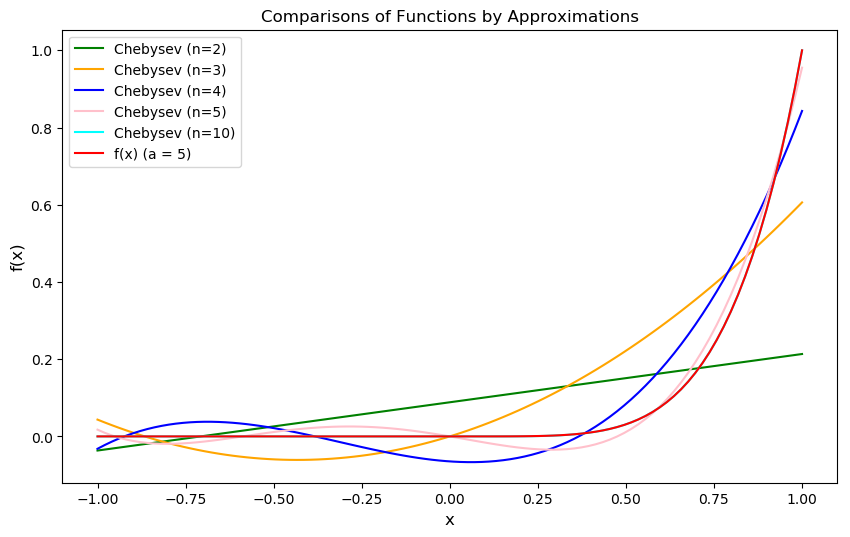

In [244]:
#Calculates various x and y values for a = 5
x = np.linspace(-1,1,100)

y_1 = SumofLagrangeBasis(Chebfunction(2),2,x,5)
y_2 = SumofLagrangeBasis(Chebfunction(3),3,x,5)
y_3 = SumofLagrangeBasis(Chebfunction(4),4,x,5)
y_4 = SumofLagrangeBasis(Chebfunction(5),5,x,5)
y_5 = SumofLagrangeBasis(Chebfunction(10),10,x,5)
z_1 = function_values(100,5)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='Chebysev (n=2)')
pyplt.plot(x,y_2, color="orange", label='Chebysev (n=3)')
pyplt.plot(x,y_3, color="blue", label='Chebysev (n=4)')
pyplt.plot(x,y_4, color="pink", label='Chebysev (n=5)')
pyplt.plot(x,y_5, color="cyan", label='Chebysev (n=10)')
pyplt.plot(x,z_1, color="red", label='f(x) (a = 5)')
pyplt.legend(loc='best')
pyplt.show()

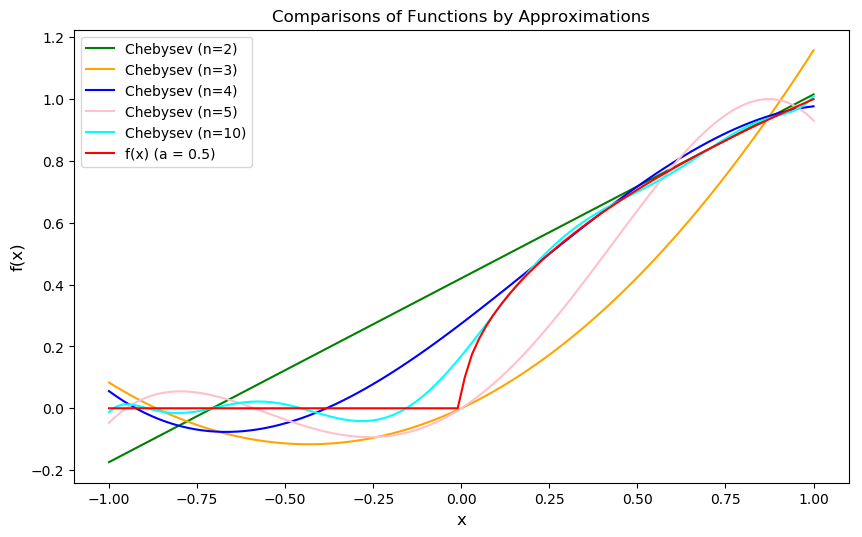

In [245]:
#Calculates the x and y values for a = 0.5
x = np.linspace(-1,1,100)

y_1 = SumofLagrangeBasis(Chebfunction(2),2,x,0.5)
y_2 = SumofLagrangeBasis(Chebfunction(3),3,x,0.5)
y_3 = SumofLagrangeBasis(Chebfunction(4),4,x,0.5)
y_4 = SumofLagrangeBasis(Chebfunction(5),5,x,0.5)
y_5 = SumofLagrangeBasis(Chebfunction(10),10,x,0.5)
z_1 = function_values(100,0.5)

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Comparisons of Functions by Approximations")
pyplt.xlabel("x", size=12)
pyplt.ylabel("f(x)", size=12)
pyplt.plot(x,y_1, color="green", label='Chebysev (n=2)')
pyplt.plot(x,y_2, color="orange", label='Chebysev (n=3)')
pyplt.plot(x,y_3, color="blue", label='Chebysev (n=4)')
pyplt.plot(x,y_4, color="pink", label='Chebysev (n=5)')
pyplt.plot(x,y_5, color="cyan", label='Chebysev (n=10)')
pyplt.plot(x,z_1, color="red", label='f(x) (a = 0.5)')
pyplt.legend(loc='best')
pyplt.show()

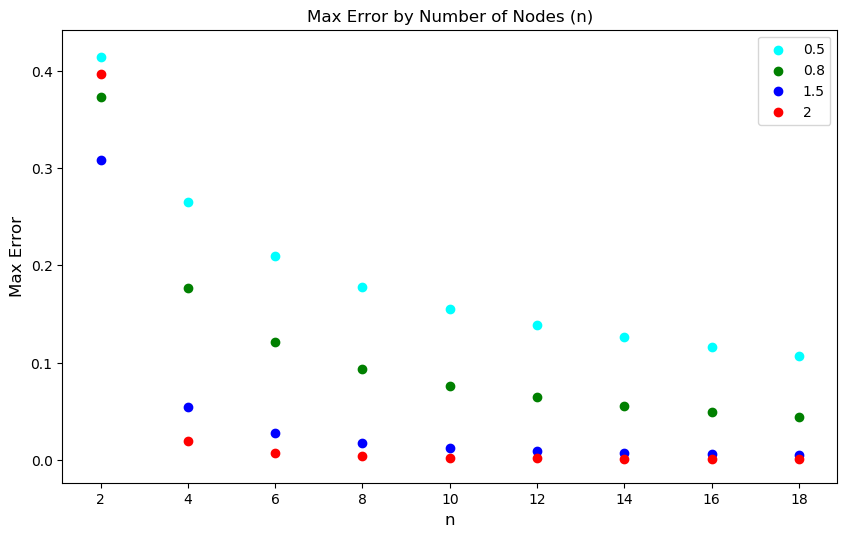

In [237]:
#Calculates the Error between the Chebyshev interpolation polynomial and the function
def ErrorMaxNormCheb(x,n,a):
    return np.max(np.abs(np.array(SumofLagrangeBasis(Chebfunction(n),n,x,a)-np.array(function_values(len(x),a)))))
 
#Various errors to be calculated for the lists of n values to get the error curves
x = np.linspace(-1,1,100)                  

n_listCheb = np.array(range(2,20,2))
ListofErrors_Cheb = []
ListofErrors_Cheb2 = []
ListofErrors_Cheb3 = []
ListofErrors_Cheb4 = []

#Calculates the y-values of the error curves
for j in n_listCheb:
    ListofErrors_Cheb.append(ErrorMaxNormCheb(x,j,0.5))
        
for j in n_listCheb:
    ListofErrors_Cheb2.append(ErrorMaxNormCheb(x,j,2))  
       
for j in n_listCheb:
    ListofErrors_Cheb3.append(ErrorMaxNormCheb(x,j,0.8))  
         
for j in n_listCheb:
    ListofErrors_Cheb4.append(ErrorMaxNormCheb(x,j,1.5))  

#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.scatter(n_listCheb,ListofErrors_Cheb,color="cyan", label="0.5")
pyplt.scatter(n_listCheb,ListofErrors_Cheb3,color="green", label="0.8")
pyplt.scatter(n_listCheb,ListofErrors_Cheb4,color="blue", label="1.5")
pyplt.scatter(n_listCheb,ListofErrors_Cheb2,color="red", label="2")
pyplt.title("Max Error by Number of Nodes (n)")
pyplt.xlabel("n", size=12)
pyplt.ylabel("Max Error", size=12)
pyplt.legend(loc='best')
pyplt.show()

Again, as before, I have plotted the max errors for $n$ and $a$ values. However, due to the rapid convergence of the interpolation polynomials I do this for only a small amount of $n$ values.

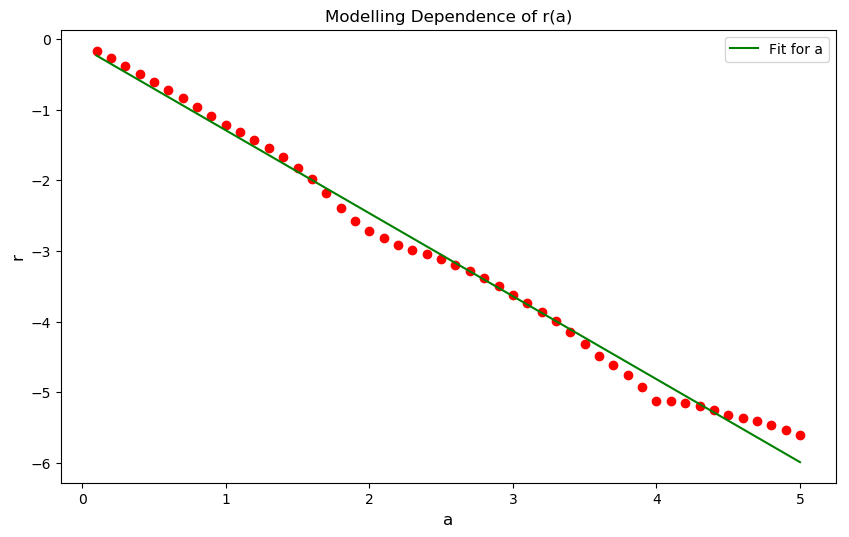

In [246]:
#List of the r values 
r_values4 = []

#List of a values, error list and list of n's to run over
a_list1 = np.linspace(0.1,5,50)
n_listCheb = np.array(range(2,20,2))
ListofErrors_Cheb3 = []

#Calculating the r values for the various a's and n's
for a in a_list1:
    for j in n_listCheb:
        ListofErrors_Cheb3.append((ErrorMaxNormCheb(x,j,a)))
    fit = np.polyfit(np.log((n_listCheb)), np.log(ListofErrors_Cheb3), deg=1)
    function_values2 = np.exp(fit[1])*np.linspace(2,20,200)**(fit[0])   
    r_values4.append(fit[0])
    ListofErrors_Cheb3 = []
    
#Plotting Stuff
fig = pyplt.figure(figsize=(10, 6), dpi=100)
pyplt.title("Modelling Dependence of r(a)")
pyplt.xlabel("a", size=12)
pyplt.ylabel("r", size=12)
fit6 = np.polyfit(a_list1, r_values4, deg=1)
function_values5 =  fit6[1]+ fit6[0]*((np.linspace(0.1,5,200)))
pyplt.scatter(a_list1,r_values4,color = 'red')
pyplt.plot(np.linspace(0.1,5,200),function_values5, color='green', label="Fit for a")
pyplt.legend(loc='best')
pyplt.show()

Unlike previous approximation polynomials, we see that there is no piecewise dependence and that the Chebyshev polynomials follow an approximately linear convergence rate as $a$ increase. We then get that $r(a) \approx C\cdot a$ where $C \approx -1.1751$. We can see this from the graphs above as we have  rapid change, and the max errors decrease as $a$ increases. This is probably due to the apt choices of the Chebyshev nodes on $[-1,1]$ which then lends the interpolation polynomial to easily approximate $f$ which is piecewise defined by $2$ polynomials. Thus it makes sense that Chebyshev interpolation to be the best approximator of $f$.